In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
from sklearn import svm
import sklearn.tree as tree
import numpy as npw
import numpy as np
from scipy import stats
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier
import altair as alt

### Read Dataset 'Loan Default.csv'

In [2]:
loan = pd.read_csv('Loan_Default.csv')
loan

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


In [3]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

### Drop Unnecessary Attribute

In [4]:
columns= ['year', 'loan_limit', 'Gender', 'approv_in_adv','loan_purpose', 
          'Credit_Worthiness', 'open_credit','business_or_commercial','Interest_rate_spread', 
          'Neg_ammortization','interest_only', 'lump_sum_payment','construction_type', 
          'occupancy_type', 'Secured_by', 'total_units','credit_type', 'co-applicant_credit_type', 'age',
          'submission_of_application', 'Region', 'Security_Type']

loan.drop(columns, axis = 1, inplace = True)
loan

,ID,loan_type,loan_amount,rate_of_interest,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
0,24890,type1,116500,NaN,NaN,360.0,118000.0,1740.0,758,98.728814,1,45.0
1,24891,type2,206500,NaN,NaN,360.0,NaN,4980.0,552,NaN,1,NaN
2,24892,type1,406500,4.560,595.00,360.0,508000.0,9480.0,834,80.019685,0,46.0
3,24893,type1,456500,4.250,NaN,360.0,658000.0,11880.0,587,69.376900,0,42.0
4,24894,type1,696500,4.000,0.00,360.0,758000.0,10440.0,602,91.886544,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,type1,436500,3.125,9960.00,180.0,608000.0,7860.0,659,71.792763,0,48.0
148666,173556,type1,586500,5.190,0.00,360.0,788000.0,7140.0,569,74.428934,0,15.0
148667,173557,type1,446500,3.125,1226.64,180.0,728000.0,6900.0,702,61.332418,0,49.0
148668,173558,type1,196500,3.500,4323.33,180.0,278000.0,7140.0,737,70.683453,0,29.0


### Rename Columns

In [5]:
loan.rename(columns = {'Credit_Score' : 'credit_score',
                       'Upfront_charges' : 'down_payment',
                        'Status' : 'status',
                        'dtir1' : 'debt_to_income_ratio'
                        }, inplace = True)

loan.head()

,ID,loan_type,loan_amount,rate_of_interest,down_payment,term,property_value,income,credit_score,LTV,status,debt_to_income_ratio
0,24890,type1,116500,NaN,NaN,360.0,118000.0,1740.0,758,98.728814,1,45.0
1,24891,type2,206500,NaN,NaN,360.0,NaN,4980.0,552,NaN,1,NaN
2,24892,type1,406500,4.56,595.0,360.0,508000.0,9480.0,834,80.019685,0,46.0
3,24893,type1,456500,4.25,NaN,360.0,658000.0,11880.0,587,69.376900,0,42.0
4,24894,type1,696500,4.00,0.0,360.0,758000.0,10440.0,602,91.886544,0,39.0


### Encoding with Label Encoder

In [6]:
loan_temp = loan

label = LabelEncoder()

colsCategorical = [col for col in loan_temp.columns if loan_temp[col].dtype == 'object']

for col in colsCategorical:
    loan_temp[col] = label.fit_transform(loan_temp[col])

### Replaced Missing values with Multiple Regression Method

In [7]:
def decision_tree(df):
    missing_cols = [col for col in df.columns if df[col].isnull().sum() > 0]
    non_missing_cols = [col for col in df.columns if df[col].isnull().sum() == 0]

    for col in missing_cols:
 
        model = BaggingRegressor(DecisionTreeRegressor(), n_estimators = 40, max_samples = 1.0, max_features = 1.0, bootstrap = False, n_jobs = -1)

        col_missing = df[df[col].isnull()]
        temp = df.drop(df[df[col].isnull()].index, axis = 0)

        X = temp.loc[:, non_missing_cols]
        y = temp[col]

        model.fit(X, y)

        y_pred = model.predict(col_missing[non_missing_cols])
        df.loc[col_missing.index, col] = y_pred
        
    return df

loan_new = decision_tree(loan_temp)
loan_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    148670 non-null  int64  
 1   loan_type             148670 non-null  int32  
 2   loan_amount           148670 non-null  int64  
 3   rate_of_interest      148670 non-null  float64
 4   down_payment          148670 non-null  float64
 5   term                  148670 non-null  float64
 6   property_value        148670 non-null  float64
 7   income                148670 non-null  float64
 8   credit_score          148670 non-null  int64  
 9   LTV                   148670 non-null  float64
 10  status                148670 non-null  int64  
 11  debt_to_income_ratio  148670 non-null  float64
dtypes: float64(7), int32(1), int64(4)
memory usage: 13.0 MB


In [8]:
loan_new.shape

(148670, 12)

### Delete Outlier w Zscore

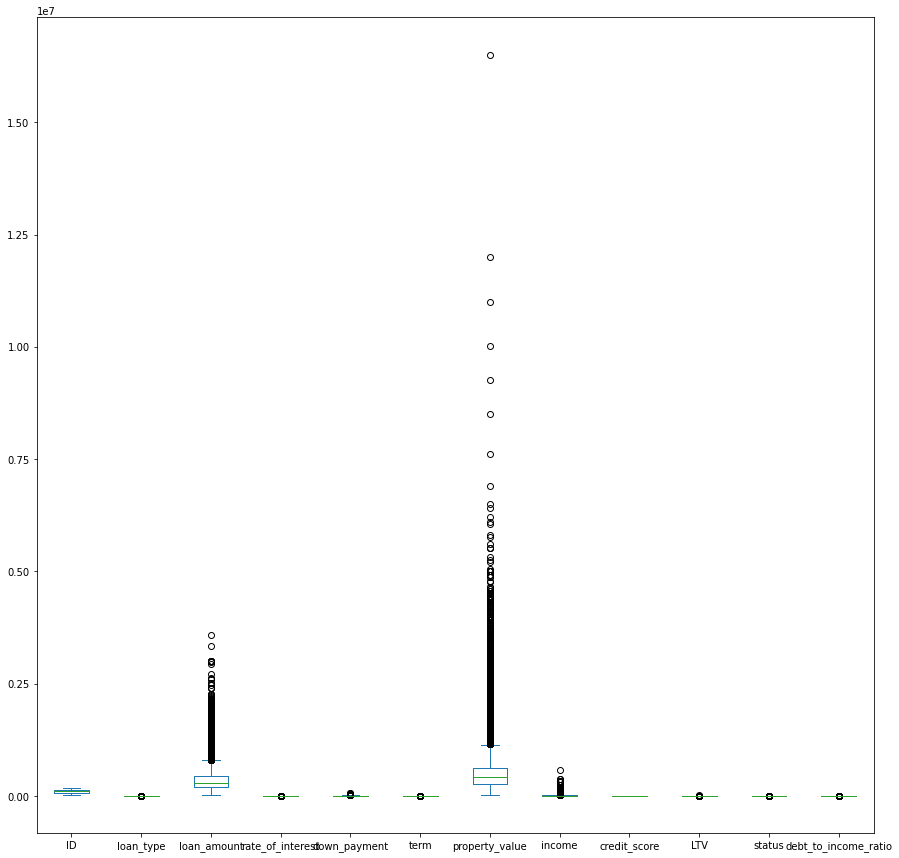

In [9]:
loan = loan_new[loan_new.columns]
loan.plot(kind='box',figsize=(15,15))
plt.show()

In [10]:
stats.zscore(loan, nan_policy='omit')
afterZscore=loan[(np.abs(stats.zscore(loan, nan_policy='omit'))<3).all(axis=1)]
loan_new = afterZscore
loan_new.shape

(140484, 12)

In [11]:
xLoan = loan_new[['credit_score', 'income', 'debt_to_income_ratio', 'property_value', 'down_payment', 'term', 'LTV']].values
xLoan[0:10]

array([[7.58000000e+02, 1.74000000e+03, 4.50000000e+01, 1.18000000e+05,
        3.43063000e+03, 3.60000000e+02, 9.87288136e+01],
       [5.52000000e+02, 4.98000000e+03, 3.72500000e+01, 2.13250000e+05,
        3.48277375e+03, 3.60000000e+02, 8.51628820e+01],
       [8.34000000e+02, 9.48000000e+03, 4.60000000e+01, 5.08000000e+05,
        5.95000000e+02, 3.60000000e+02, 8.00196850e+01],
       [5.87000000e+02, 1.18800000e+04, 4.20000000e+01, 6.58000000e+05,
        2.95000000e+02, 3.60000000e+02, 6.93768997e+01],
       [6.02000000e+02, 1.04400000e+04, 3.90000000e+01, 7.58000000e+05,
        0.00000000e+00, 3.60000000e+02, 9.18865435e+01],
       [8.64000000e+02, 1.00800000e+04, 4.00000000e+01, 1.00800000e+06,
        3.70000000e+02, 3.60000000e+02, 7.00892857e+01],
       [8.60000000e+02, 5.04000000e+03, 4.40000000e+01, 4.38000000e+05,
        5.12000000e+03, 3.60000000e+02, 7.91095890e+01],
       [8.63000000e+02, 3.78000000e+03, 4.20000000e+01, 3.08000000e+05,
        5.60988000e+03, 3

In [12]:
xLoan.shape

(140484, 7)

In [13]:
yLoan = loan_new['status']
yLoan[0:10]

0    1
1    1
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: status, dtype: int64

## EDA (Exploratory data analysis)

<AxesSubplot: xlabel='status', ylabel='count'>

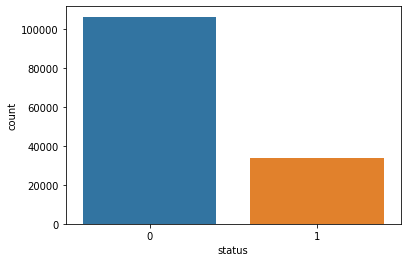

In [14]:
sns.countplot(data = loan_new, x = 'status')

<AxesSubplot: >

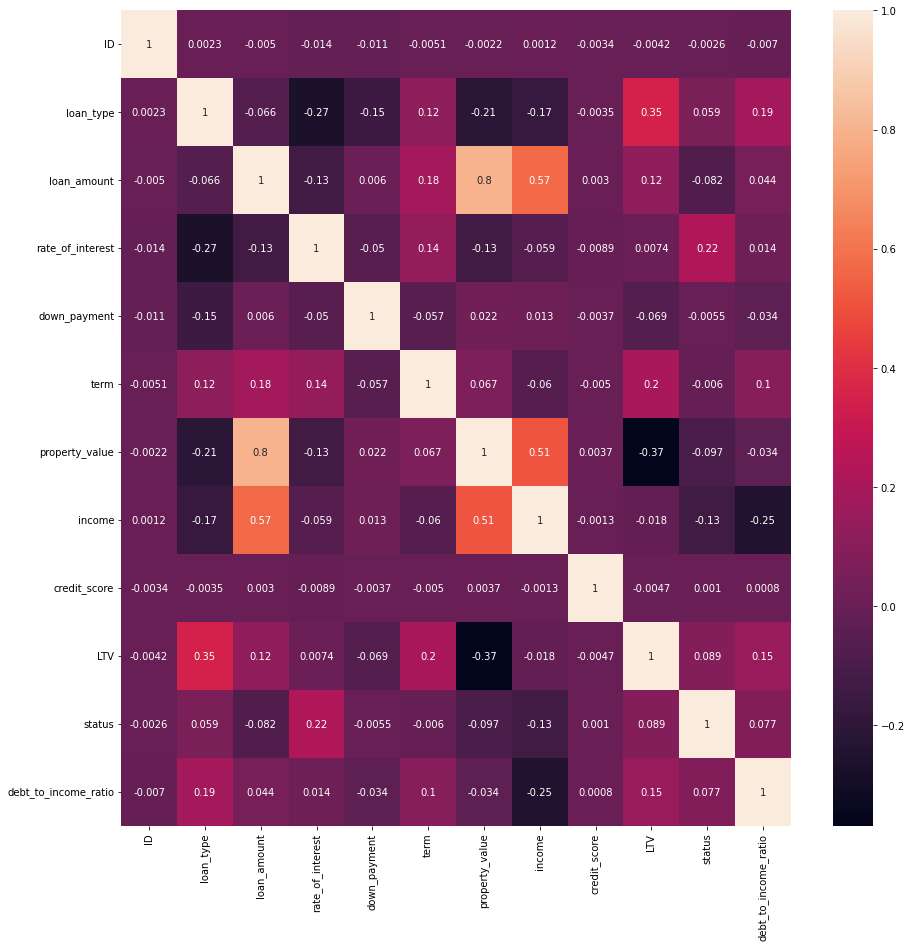

In [15]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(loan_new.corr(), annot = True, ax=ax)

<AxesSubplot: title={'center': 'Status Approved vs Not Approved'}>

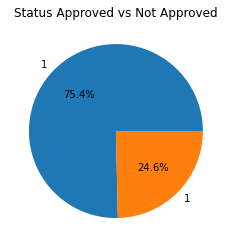

In [18]:
loan.groupby('status')['ID'].count().plot(kind='pie',
                                        labels=loan['status'],
                                        title = 'Status Approved vs Not Approved', ylabel='', autopct='%.1f%%')

### Decision Tree

In [19]:
xTrain_loan, xTest_loan, yTrain_loan, yTest_loan = train_test_split(xLoan, yLoan, test_size = 0.3)

In [20]:
loanTree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 16)
loanTree

DecisionTreeClassifier(criterion='entropy', max_depth=16)

In [21]:
loanTree.fit(xTrain_loan, yTrain_loan)

DecisionTreeClassifier(criterion='entropy', max_depth=16)

In [22]:
predLoanTree = loanTree.predict(xTest_loan)

In [23]:
print(predLoanTree [0:10])
print(yTest_loan [0:10])

[0 1 0 1 0 0 1 0 0 1]
63343     0
128759    1
26280     0
142494    1
112277    0
26192     0
147987    1
41971     1
105893    0
35693     1
Name: status, dtype: int64


In [24]:
print('DecisionTrees & Accuracy', metrics.accuracy_score(yTest_loan, predLoanTree))

DecisionTrees & Accuracy 0.7986760309400655


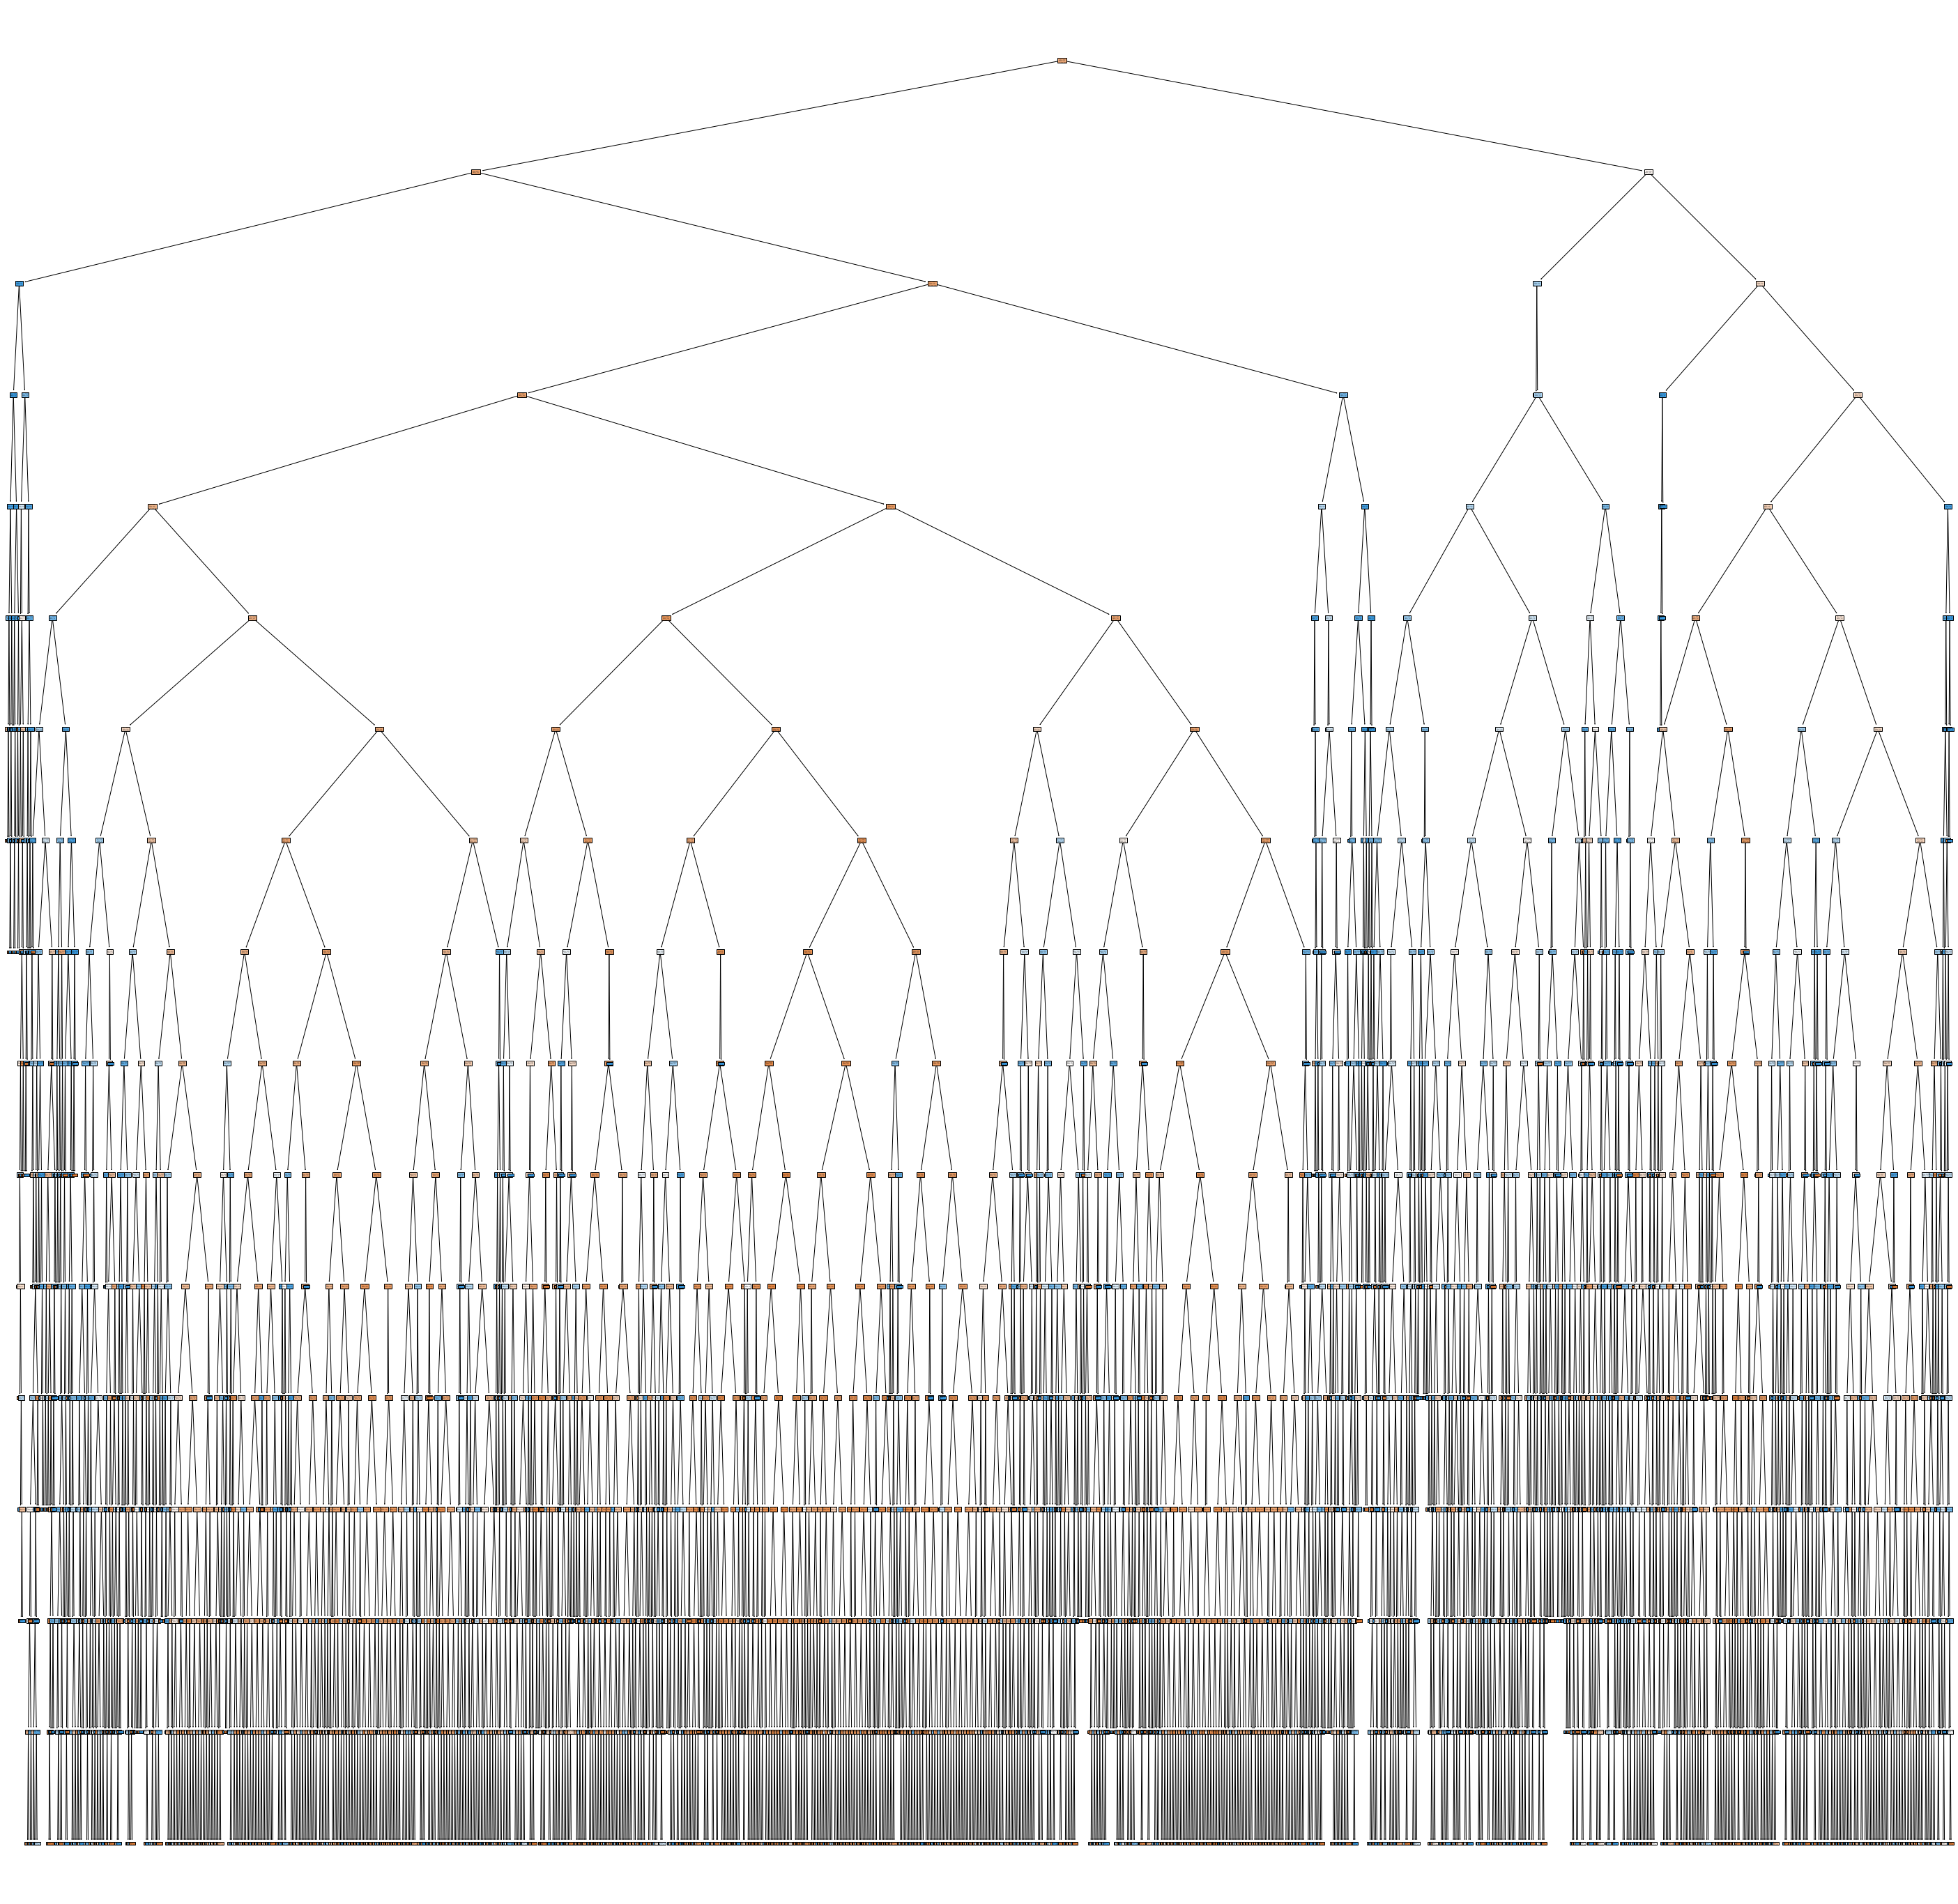

In [25]:
fig = plt.figure(figsize=(50,50))
tree.plot_tree(loanTree, filled=True)
plt.show()

In [26]:
loan_sample = loan_new.sample(frac=0.1)
loan_sample.reset_index()

,index,ID,loan_type,loan_amount,rate_of_interest,down_payment,term,property_value,income,credit_score,LTV,status,debt_to_income_ratio
0,135025,159915,1,156500,3.990000,263.0000,180.0,178000.0,6660.0,806,87.921348,0,35.0
1,58989,83879,0,116500,4.678125,2101.0000,360.0,437500.0,8280.0,640,91.015625,1,44.9
2,70332,95222,0,266500,3.125000,999.0000,180.0,638000.0,12960.0,666,41.771160,0,10.0
3,39455,64345,0,416500,4.906625,9620.6290,360.0,468000.0,5100.0,668,74.089023,1,36.0
4,106649,131539,0,576500,3.875000,796.1800,360.0,618000.0,7200.0,675,93.284790,0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14043,88618,113508,0,206500,3.990000,7400.0000,360.0,308000.0,3420.0,819,67.045455,0,46.0
14044,78122,103012,0,226500,4.750000,1424.0800,360.0,278000.0,11460.0,692,81.474820,0,15.0
14045,126290,151180,0,106500,4.246500,2893.3135,360.0,408000.0,2760.0,892,26.102941,1,36.0
14046,36942,61832,0,306500,3.625000,3040.0000,360.0,418000.0,3000.0,586,73.325359,0,44.0


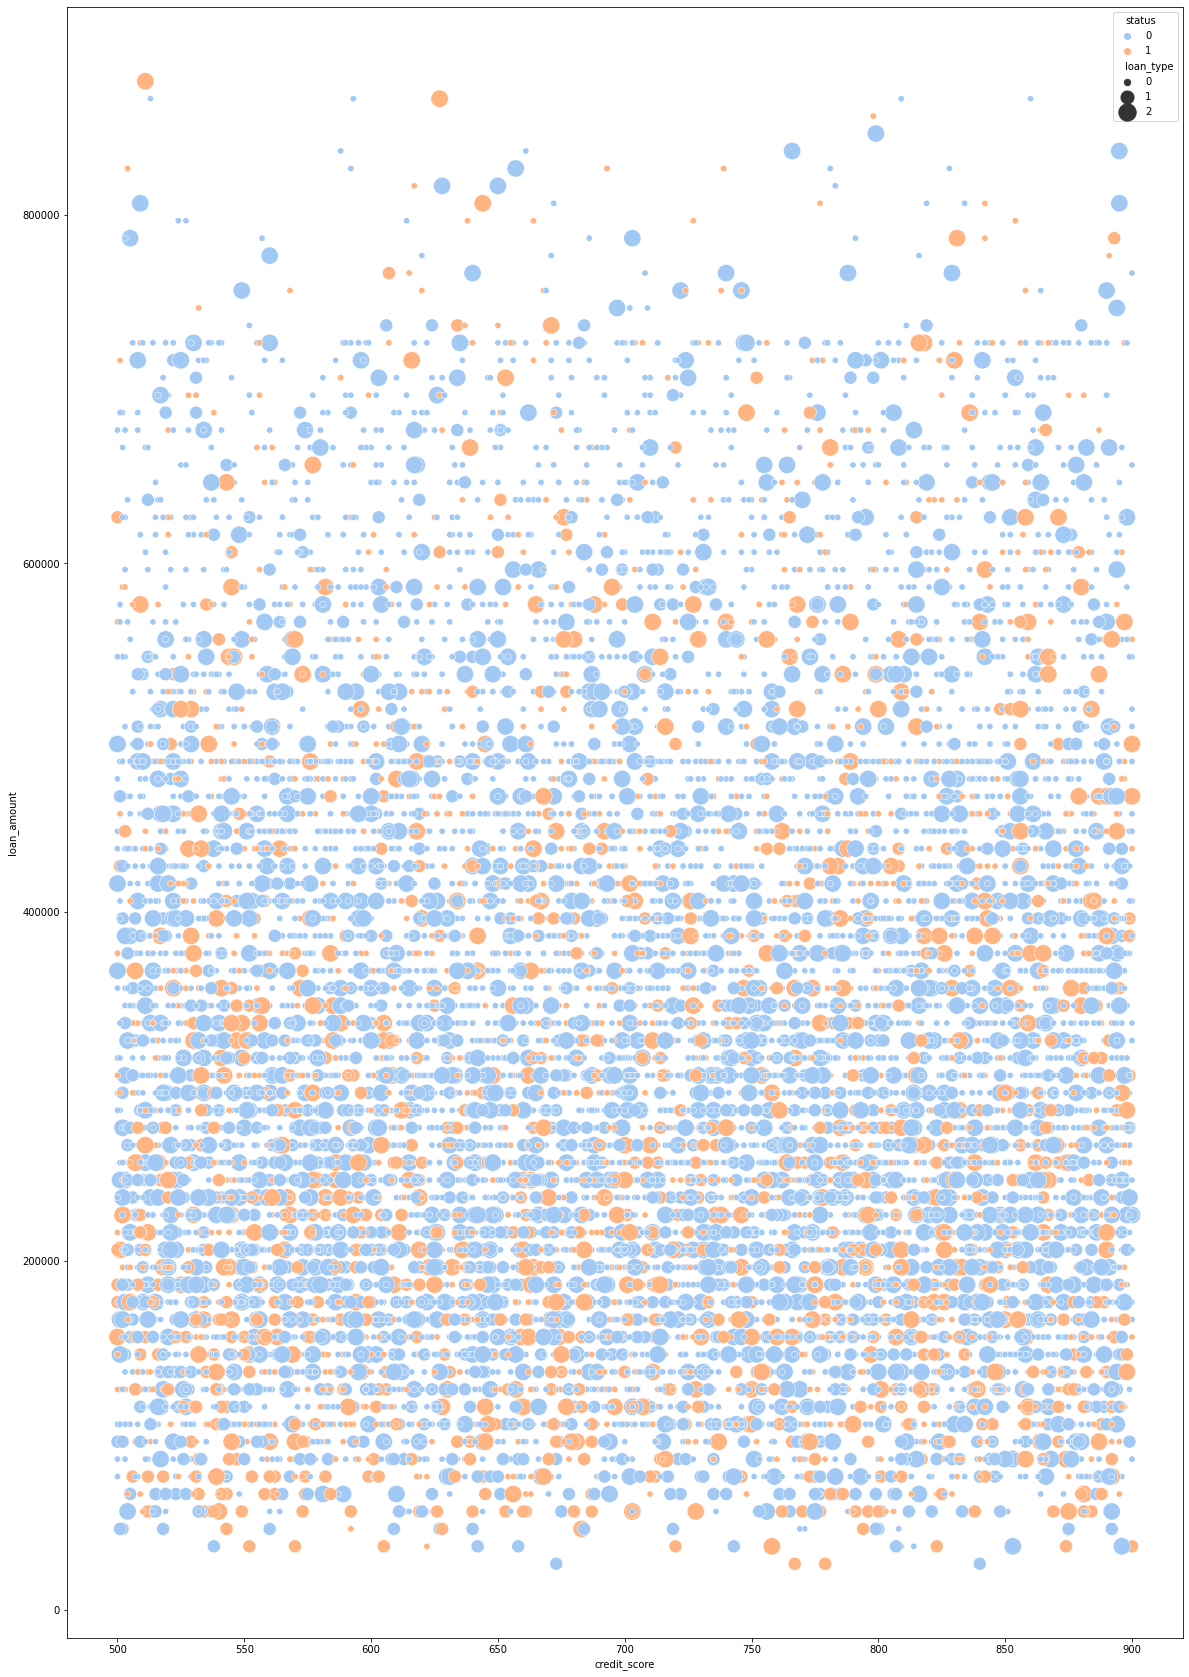

In [27]:
plt.figure(figsize=(20, 30))

sns.scatterplot(data = loan_sample, x = "credit_score", y = "loan_amount",
               hue = "status", size = "loan_type",
               sizes = (40, 300), palette = "pastel")

plt.show()

In [28]:
loan500 = loan_sample.head(500)

selection = alt.selection_multi(fields=["status"])

alt.Chart(loan500).mark_bar().encode(
   x = "credit_score",
   y= "loan_amount",
   color="status", 
   opacity=alt.condition(selection, alt.value(1), alt.value(0.5))
).properties(
   height=500, width=800
).add_selection(
    selection
)

alt.Chart(...)

### KNN

In [29]:
bank_loan = loan_new[['loan_type', 'loan_amount', 'rate_of_interest','credit_score', 'income', 'term','debt_to_income_ratio', 'property_value', 'down_payment', 'term', 'LTV', 'status']]
bank_loan.head()

,loan_type,loan_amount,rate_of_interest,credit_score,income,term,debt_to_income_ratio,property_value,down_payment,term,LTV,status
0,0,116500,4.546875,758,1740.0,360.0,45.00,118000.0,3430.63000,360.0,98.728814,1
1,1,206500,3.816000,552,4980.0,360.0,37.25,213250.0,3482.77375,360.0,85.162882,1
2,0,406500,4.560000,834,9480.0,360.0,46.00,508000.0,595.00000,360.0,80.019685,0
3,0,456500,4.250000,587,11880.0,360.0,42.00,658000.0,295.00000,360.0,69.376900,0
4,0,696500,4.000000,602,10440.0,360.0,39.00,758000.0,0.00000,360.0,91.886544,0


In [30]:
scaler = StandardScaler()

In [31]:
scaler.fit(bank_loan.drop('status',axis=1))
scaled_features = scaler.transform(bank_loan.drop('status', axis=1))

In [32]:
loan_feat = pd.DataFrame(scaled_features, columns=bank_loan.columns[:-1])
loan_feat

,loan_type,loan_amount,rate_of_interest,credit_score,income,term,debt_to_income_ratio,property_value,down_payment,term,LTV
0,-0.534903,-1.262329,0.748103,0.503230,-1.214333,0.417896,0.607557,-1.321794,0.139838,0.417896,1.358072
1,0.984627,-0.698945,-0.526417,-1.273867,-0.364489,0.417896,-0.119521,-0.951909,0.158280,0.417896,0.623095
2,-0.534903,0.553020,0.770990,1.158858,0.815850,0.417896,0.701373,0.192693,-0.863066,0.417896,0.344446
3,-0.534903,0.866012,0.230404,-0.971933,1.445364,0.417896,0.326107,0.775188,-0.969169,0.417896,-0.232160
4,-0.534903,2.368370,-0.205553,-0.842533,1.067655,0.417896,0.044658,1.163518,-1.073505,0.417896,0.987370
...,...,...,...,...,...,...,...,...,...,...,...
140479,-0.534903,0.740815,-1.731402,-0.350812,0.390928,-2.838216,0.889006,0.581023,2.449141,-2.838216,-0.101273
140480,-0.534903,1.679789,1.869601,-1.127214,0.202073,0.417896,-2.206938,1.280017,-1.073505,0.417896,0.041549
140481,-0.534903,0.803413,-1.731402,0.020136,0.139122,-2.838216,0.982823,1.047019,-0.639668,-2.838216,-0.667996
140482,-0.534903,-0.761543,-1.077466,0.322070,0.202073,-2.838216,-0.893507,-0.700466,0.455568,-2.838216,-0.161374


In [33]:
x = loan_feat
y = bank_loan['status']
xTrain, xTest, yTrain, yTest = train_test_split(scaled_features, y, test_size = 0.3, random_state=42)

In [34]:
print('Train set:', xTrain.shape, yTrain.shape)
print('Test set:', xTest.shape, yTest.shape)

Train set: (98338, 11) (98338,)
Test set: (42146, 11) (42146,)


In [35]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xTrain, yTrain)

KNeighborsClassifier()

In [36]:
pred = knn.predict(xTest)

In [37]:
conf_mat=confusion_matrix(yTest,pred)
print(conf_mat)

[[30375  1548]
 [ 5959  4264]]


In [38]:
print(classification_report(yTest,pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89     31923
           1       0.73      0.42      0.53     10223

    accuracy                           0.82     42146
   macro avg       0.78      0.68      0.71     42146
weighted avg       0.81      0.82      0.80     42146



In [39]:
print("Misclassification error rate:", round(np.mean(pred!=yTest),3))

Misclassification error rate: 0.178


In [40]:
acc=accuracy_score(yTest,pred)
acc

0.8218810800550468

In [41]:
error_rate = []
for i in range(5,60):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xTrain, yTrain)
    pred_i = knn.predict(xTest)
    error_rate.append(np.mean(pred_i != yTest))

Text(0, 0.5, 'Error (misclassification) Rate')

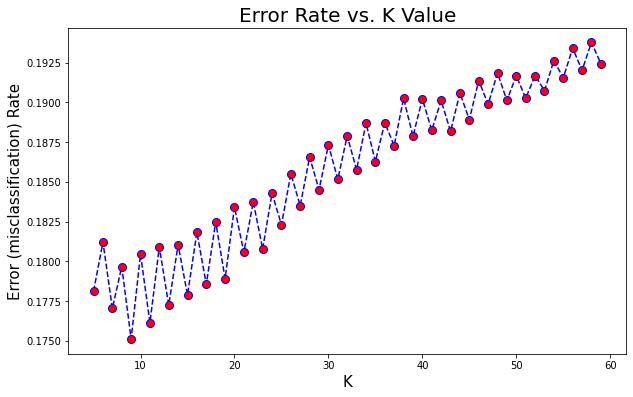

In [42]:
plt.figure(figsize=(10,6))
plt.plot(range(5,60),error_rate, color="blue", linestyle="dashed",marker="o",
        markerfacecolor="red", markersize=8)
plt.title("Error Rate vs. K Value", fontsize=20)
plt.xlabel("K", fontsize=15)
plt.ylabel("Error (misclassification) Rate", fontsize=15)

## SVM

In [43]:
features_loan = loan_new[['loan_type', 'loan_amount', 'rate_of_interest','credit_score', 'income', 'term','debt_to_income_ratio', 'property_value', 'down_payment', 'term', 'LTV']]
X = np.asarray(features_loan)
y = np.asarray(loan_new['status'])

In [44]:
features_loan.isna().sum()

loan_type               0
loan_amount             0
rate_of_interest        0
credit_score            0
income                  0
term                    0
debt_to_income_ratio    0
property_value          0
down_payment            0
term                    0
LTV                     0
dtype: int64

In [45]:
features_loan['loan_type'] = features_loan['loan_type'].astype('int64')
features_loan['rate_of_interest'] = features_loan['rate_of_interest'].astype('int64')
features_loan['income'] = features_loan['income'].astype('int64')
features_loan['term'] = features_loan['term'].astype('int64')
features_loan['debt_to_income_ratio'] = features_loan['debt_to_income_ratio'].astype('int64')
features_loan['property_value'] = features_loan['property_value'].astype('int64')
features_loan['down_payment'] = features_loan['down_payment'].astype('int64')
features_loan['term'] = features_loan['term'].astype('int64')
features_loan['LTV'] = features_loan['LTV'].astype('int64')

features_loan.dtypes

C:\Users\steve\AppData\Local\Temp\ipykernel_28372\2372604492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_loan['loan_type'] = features_loan['loan_type'].astype('int64')
C:\Users\steve\AppData\Local\Temp\ipykernel_28372\2372604492.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_loan['rate_of_interest'] = features_loan['rate_of_interest'].astype('int64')
C:\Users\steve\AppData\Local\Temp\ipykernel_28372\2372604492.py:3: SettingWithCopyWarning: 
A value is trying to be set on a cop

loan_type               int64
loan_amount             int64
rate_of_interest        int64
credit_score            int64
income                  int64
term                    int64
debt_to_income_ratio    int64
property_value          int64
down_payment            int64
term                    int64
LTV                     int64
dtype: object

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape

(98338, 11)

In [47]:
clf = svm.SVC(kernel='rbf').fit(X_train, y_train)

In [48]:
yhat = clf.predict(X_test)
yhat[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [49]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86     31923
           1       0.00      0.00      0.00     10223

    accuracy                           0.76     42146
   macro avg       0.38      0.50      0.43     42146
weighted avg       0.57      0.76      0.65     42146



C:\Users\steve\anaconda3\envs\data\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\steve\anaconda3\envs\data\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\steve\anaconda3\envs\data\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
accSVM = accuracy_score(y_test,yhat)
accSVM

0.7574384283205998

## Comparison of all Classification Model

In [52]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(yTest_loan, predLoanTree))
print("KNN's Accuracy          : ", metrics.accuracy_score(yTest, pred))
print("SVM's Accuracy          : ", metrics.accuracy_score(y_test, yhat))

DecisionTrees's Accuracy:  0.7986760309400655
KNN's Accuracy          :  0.8218810800550468
SVM's Accuracy          :  0.7574384283205998
